***Задачи исследования первой части***

На основе данных Маркетплейса проведем анализ:

1. установим за какой период у нас есть дата о платежах;
2. узнаем сколько уникальных клиентов/категорий/методов оплаты/статусов у нас есть;
3. подсчитаем средний чек клиента;
4. посмотрим распределение по статусам (сколько заказов у нас отменено, сколько завершено, сколько возвращено);
5. изучим динамику продаж в виде таблицы и в виде графика;
6. рассмотрим продажи по дням недели в виде графика;
7. посмотрим GMV по каждой категории, так как нужно узнать, какая категория товара приносит больше всего денег;
8. узнаем долю отмен в каждой категории;
9. посмотрим на какие категории мы даем скидки;
10. составим рейтинг самых продаваемых товаров.

***Задачи исследования второй части***

1. выделим продажи айфонов в артикуле товара и самсунг гелакси, сравниваем между собой
2. декомпозируем динамику продаж в разрезе категорий товара (несколько графиков на одном полотне)
3. подсчитаем повторных покупателей
4. определим корреляцию между количеством заказов и категорией товара
5. определим корреляцию между отменами заказа и методом оплаты
6. изучим клиентскую аудиторию по дате начала обслуживания

***Выводы по первой части***

1. Данные охватывают период с 01.07.2021 по 12.01.2022
2. Уникальных клиентов: 30874, Уникальные категории: 16, Уникальных методов оплаты: 10, Уникальных статусов: 9
3. Средний чек клиента: 3131.79 руб.
4. Заказов в статусе завершен 77 810, в статусе отменен 41 190
5. Пик продаж пришелся на 01.11.2021 (98 070 888 руб.), далее было снижение, на 01.12.2021 (27 540 437 руб.)
6. Больше всего продаж приходится на четверг
7. Большая часть продаж (30%) приходится на категорию мобильные телефоны и планшеты. На втором месте бытовая техника (14%) и мужская мода (9%)
8. Больше всего отмен в категории развлечения (12%)
9. Больше всего скидок даем на мобильные телефоны и планшеты, бытовая техника и развлечения
10. Самый продаваемый товар в категории: Традиционные подарки	(артикул: Al Muhafiz Sohan Halwa Almond)	1 615 шт. заказов

***Выводы по второй части***

1. По сумме продаж товаров у iPhone больше, чем у Galaxy (9 469 897 vs 6 414 854 по сумме). Количество продаж товаров Galaxy больше, чем iPhone (266 vs 205)
2. У категории "Мобильные телефоны и планшеты" было два пика - 2021-08 и 2021-11. У категории "\NР" было два пика - 2021-09 и 2021-10. У категории "Развлечения" и "Бытовая техника" было два пика - 2021-09 и 2021-11. У остальных категорий пик приходится на 2021-11
3. Доля повторных покупателей составляет 50%, что является положительной характеристикой маркетплейса.
4. Статистически значимые корреляции между категорией товара и количеством заказов отсутствуют.
5. Вывод: значимые корреляции с отменой заказа наблюдаются при методах оплаты  Payaxis, ебетовая карта Raif и ваучер:
  1) платежная система Payaxis - 0.5 (отмен 76% от всего количества заказов, завершенных только 20%)
  2) дебетовая карта Raif - 0.1 (отмен 97% от всего количества заказов, завершенных - 0,02%)
  3) ваучер - 0.2 (отмен 49% от всего количества заказов, завершенных - 45%)
(*для сведения:*
*наложенный платеж - 0.6 (отмен 6% от всего количества заказов, завершенных - 72%)* *для сведения*)
6. Наибольшее количество клиентов было привлечено 2021-11, больше всего клиентов с Лайфтаймом 3 месяца.


## Загрузка данных

In [457]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [458]:
# Загрузка данных из файла marketplace_dataframe.csv
df = pd.read_csv("/content/drive/MyDrive/Zerocoder/marketplace_dataframe.csv")

In [459]:
# Вывод первых пяти строк датафрейма
df.head()

,Unnamed: 0,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
0,0,211131,завершен,01.07.2021,kreations_YI 06-L,1950,1,1950,100147443,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f1
1,1,211133,отменен,01.07.2021,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Красота и уход,0,наложенный платеж,01.07.2021,2021-7,1e4f2
2,2,211134,отменен,01.07.2021,Ego_UP0017-999-MR0,2450,1,2450,100147445,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f3
3,3,211135,завершен,01.07.2021,kcc_krone deal,360,1,60,100147446,Красота и уход,300,наложенный платеж,01.07.2021,2021-7,1e4f4
4,4,211136,заказ возвращен,01.07.2021,BK7010400AG,555,2,1110,100147447,Традиционные подарки,0,наложенный платеж,01.07.2021,2021-7,1e4f5


## Предобработка данных

In [460]:
# Удаление ненужных колонок
df = df.drop(['Unnamed: 0'], axis=1)

In [461]:
# Удаление записей с пропуском значений
df = df.dropna()

In [462]:
# Обработка дубликатов
print(df.duplicated().sum())

0


In [463]:
# Для приведения данных в столбце "Дата создания" к формату "%d.%m.%Y" воспользуемся следующей командой:
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format='%d.%m.%Y')
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format='%d.%m.%Y')

## Решение аналитических задач на данных маркетплейса с ChatGPT

## Первая часть исследования

## За какой период рассматриваются данные

In [464]:
# Установим период даты оплаты
start_date = df['Дата создания'].min()
end_date = df['Дата создания'].max()
print(f'Данные охватывают период с {start_date} по {end_date}')

Данные охватывают период с 2021-07-01 00:00:00 по 2022-01-12 00:00:00


## Сколько уникальных клиентов/категорий/методов оплаты/статусов

In [465]:
# Узнаем количество уникальных клиентов, категорий, методов оплаты и статусов
unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()
print('Уникальные клиенты:', unique_clients)
print('Уникальные категории:', unique_categories)
print('Уникальные методы оплаты:', unique_payment_methods)
print('Уникальные статусы:', unique_statuses)

Уникальные клиенты: 30874
Уникальные категории: 16
Уникальные методы оплаты: 10
Уникальные статусы: 9


In [466]:
df['Категория'].unique()

array(['Женская мода', 'Красота и уход', 'Традиционные подарки',
       'Мобильные телефоны и планшеты', 'Бытовая техника', 'Дом и быт',
       'Мужская мода', 'Дети и младенцы', '\\N', 'Компьютерная техника',
       'Гипермаркет', 'Другое', 'Здоровье и спорт', 'Развлечения',
       'Книги', 'Школа и образование'], dtype=object)

In [467]:
df['Метод оплаты'].unique()

array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis', 'ваучер'],
      dtype=object)

In [468]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании',
       'обмен'], dtype=object)

In [469]:
df.query('Статус in ("завершен","получен")')['Статус'].unique()

array(['завершен', 'получен'], dtype=object)

## Определение среднего чека клиента

In [470]:
# Подсчитаем средний чек клиента
df['Сумма заказа'] = df.query('Статус in ("завершен","получен")')['Цена'] * df['Количество заказов']
average_order_value = df.groupby('ID клиента')['Сумма заказа'].mean().mean()
print('Средний чек клиента:', average_order_value)

Средний чек клиента: 3131.7934868141633


## Распределение по статусам заказа

In [471]:
# Посмотрим распределение по статусам
status_distribution = df['Статус'].value_counts()

<ipython-input-472-991c9bfbc533>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


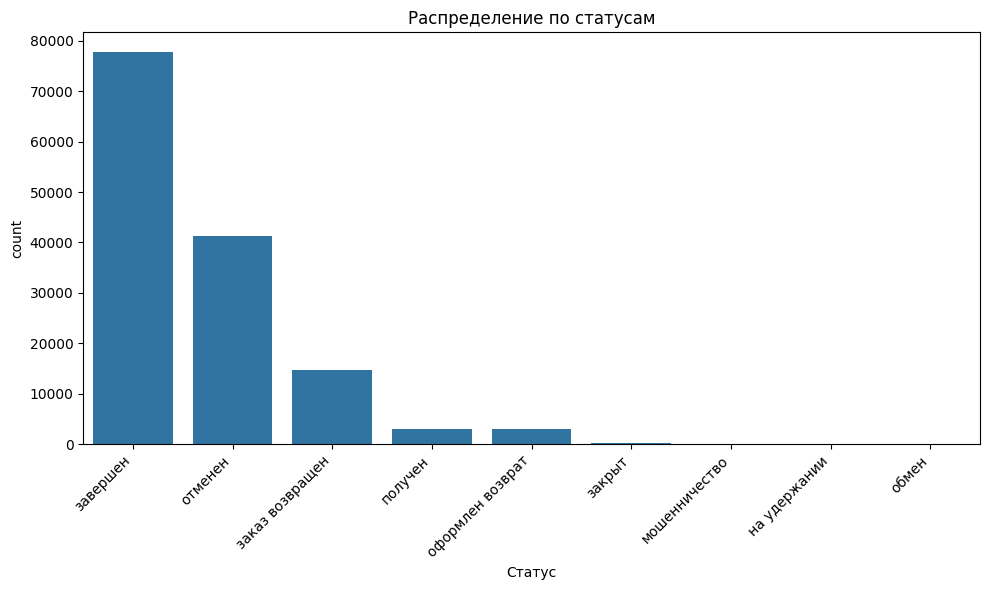

In [472]:
# Визуализация распределения по статусам
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Статус')
ax.set_title('Распределение по статусам')

# Поворот меток оси Х на 45 градусов
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Показать график
plt.tight_layout() # Обеспечивает правильное размещение меток
plt.show()

In [473]:
print('Распределение по статусам:')
status_distribution

Распределение по статусам:


Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
закрыт                213
мошенничество           7
на удержании            6
обмен                   4
Name: count, dtype: int64

## Представление помесячной динамики продаж

In [474]:
# Преобразуем данные о дате создания и добавим новый столбец 'Месяц' и 'Год'
df['Дата создания'] = pd.to_datetime(df['Дата создания'])
df['Месяц'] = df['Дата создания'].dt.month
df['Год'] = df['Дата создания'].dt.year

# Сгруппируем данные по месяцу и году и посчитаем сумму продаж
sales_by_month = df.query('Статус in ("завершен","получен")').groupby(['Год', 'Месяц'])['Итоговая сумма'].sum()

# Уберем пустые месяцы (если они есть)
sales_by_month = sales_by_month[sales_by_month != 0]

# Выведем динамику продаж по месяцам в виде таблицы
print('Динамика продаж по месяцам:')
print(sales_by_month)

Динамика продаж по месяцам:
Год   Месяц
2021  7        11178180
      8        17341010
      9        26411783
      10       24806291
      11       98070888
      12       27540437
2022  1        14346538
Name: Итоговая сумма, dtype: int64


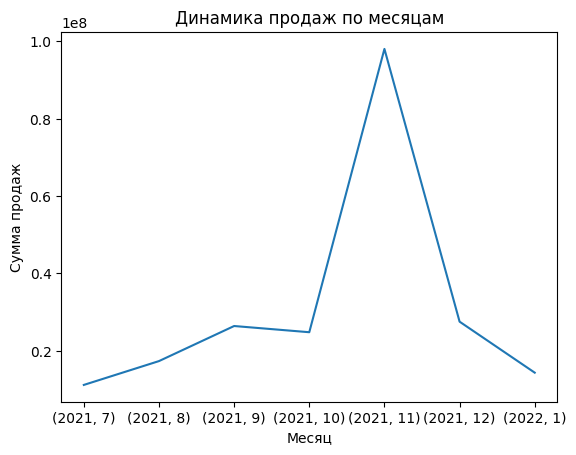

In [475]:
sales_by_month.plot(kind='line', xlabel='Месяц', ylabel='Сумма продаж', title='Динамика продаж по месяцам')
plt.show()

## Продажи по дням недели

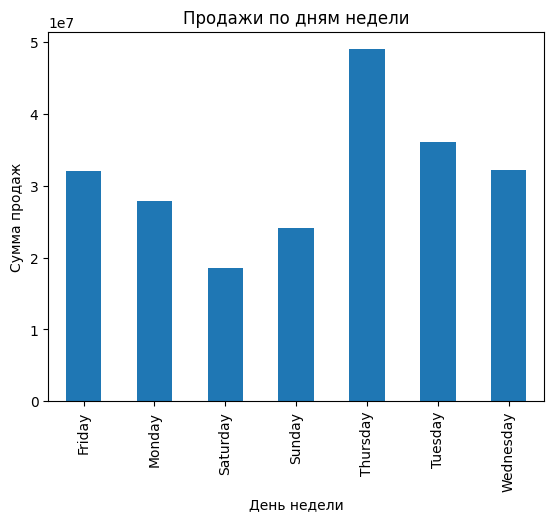

In [476]:
# Рассмотрим продажи по дням недели в виде графика
sales_by_weekday = df.query('Статус in ("завершен","получен")').groupby(df['Дата создания'].dt.day_name())['Итоговая сумма'].sum()
sales_by_weekday.plot(kind='bar', xlabel='День недели', ylabel='Сумма продаж', title='Продажи по дням недели')
plt.show()

## GMV по каждой категории

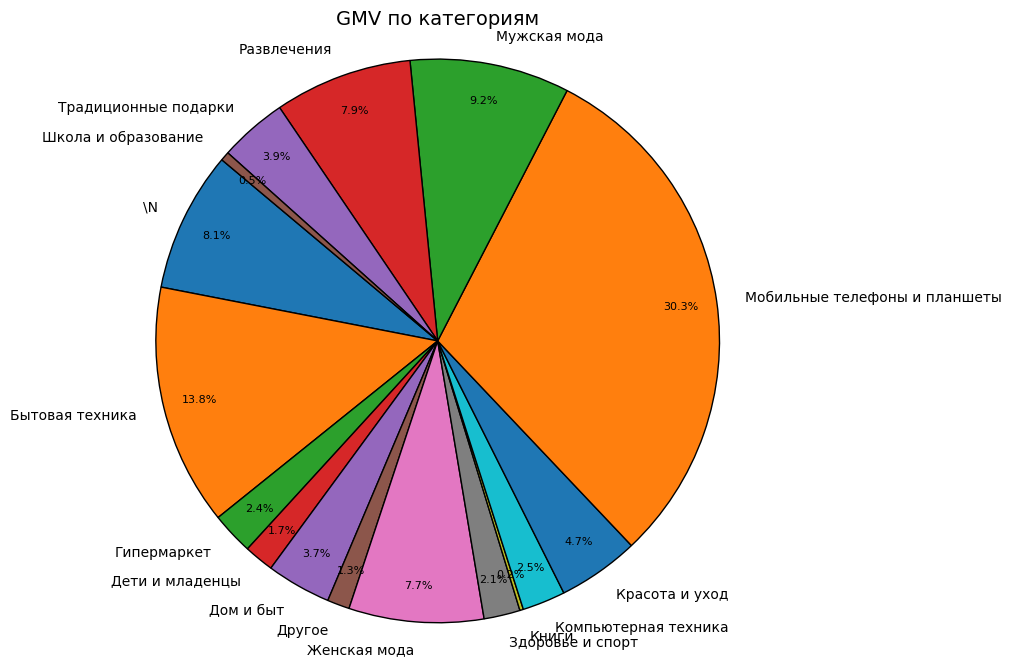

In [477]:
# Посмотрим GMV по каждой категории
gmv_by_category = df.query('Статус in ("завершен","получен")').groupby('Категория')['Итоговая сумма'].sum()
#print('GMV по категориям:')
#print(gmv_by_category)

# График круговой диаграммы
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(gmv_by_category, labels=gmv_by_category.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

for i, autotext in enumerate(autotexts):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    autotext.set_position((0.87*x, 0.87*y))

plt.setp(autotexts, size=8, weight='normal')
plt.title('GMV по категориям', fontsize=14)
plt.axis('equal')
plt.show()

In [478]:
print('GMV по категориям:')
gmv_by_category

GMV по категориям:


Категория
\N                               17689281
Бытовая техника                  30406974
Гипермаркет                       5333855
Дети и младенцы                   3759564
Дом и быт                         8145177
Другое                            2813074
Женская мода                     16982241
Здоровье и спорт                  4560869
Книги                              448572
Компьютерная техника              5428532
Красота и уход                   10276300
Мобильные телефоны и планшеты    66659007
Мужская мода                     20124192
Развлечения                      17377463
Традиционные подарки              8555088
Школа и образование               1134938
Name: Итоговая сумма, dtype: int64

## Доля отмен в каждой категории

In [479]:
# Узнаем долю отмен в каждой категории
cancel_rate_by_category = df[df['Статус'] == 'отменен'].groupby('Категория').size() / df.groupby('Категория').size()
print('Доля отмен в каждой категории:')
print(cancel_rate_by_category)

Доля отмен в каждой категории:
Категория
\N                               0.383206
Бытовая техника                  0.416276
Гипермаркет                      0.302626
Дети и младенцы                  0.181940
Дом и быт                        0.306903
Другое                           0.414147
Женская мода                     0.268658
Здоровье и спорт                 0.215196
Книги                            0.116592
Компьютерная техника             0.444076
Красота и уход                   0.190896
Мобильные телефоны и планшеты    0.450209
Мужская мода                     0.180209
Развлечения                      0.582343
Традиционные подарки             0.187360
Школа и образование              0.173980
dtype: float64


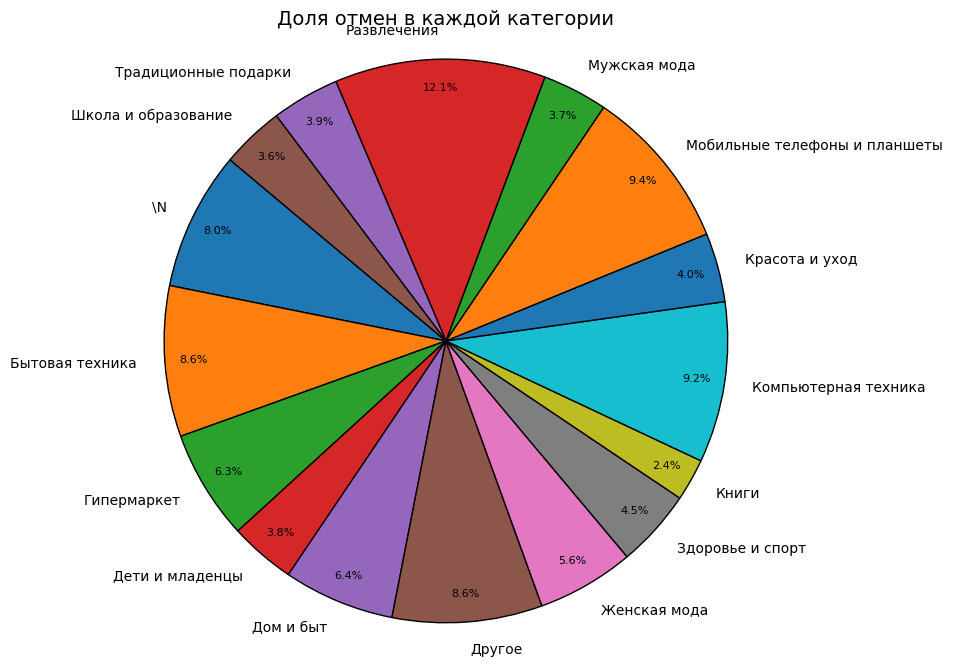

In [480]:
# График круговой диаграммы доли отмен по категориям
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(cancel_rate_by_category, labels=cancel_rate_by_category.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

for i, autotext in enumerate(autotexts):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    autotext.set_position((0.9*x, 0.9*y))

plt.setp(autotexts, size=8, weight='normal')
plt.title('Доля отмен в каждой категории', fontsize=14)
plt.axis('equal')
plt.show()

## Cумма скидок по категориям

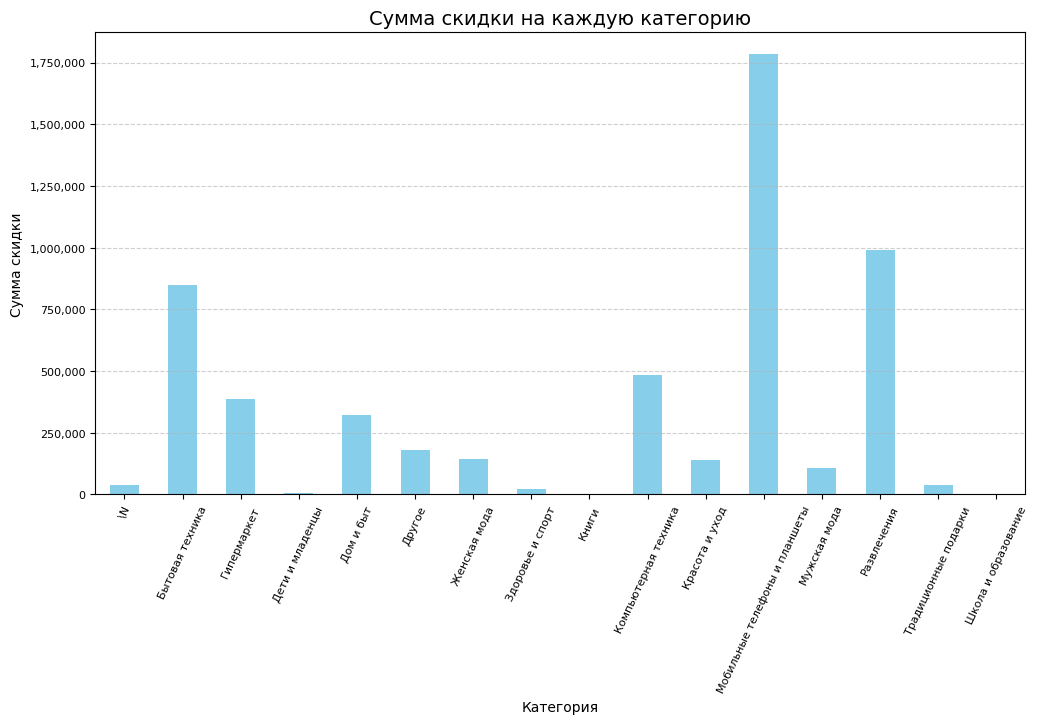

In [481]:
# Построим гистограмму суммы скидки на каждую категорию
df['Сумма скидки'] = pd.to_numeric(df['Сумма скидки'], errors='coerce')
plt.figure(figsize=(12, 6))
categories_with_discount = df['Категория'].unique()
ax = df[df['Категория'].isin(categories_with_discount)].query('Статус in ("завершен","получен")').groupby('Категория')['Сумма скидки'].sum().plot(kind='bar', color='skyblue')
plt.title('Сумма скидки на каждую категорию', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Сумма скидки')

# Отобразить значения оси Y без использования научной нотации
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.xticks(rotation=65)
plt.xticks(fontsize=8)  # Уменьшить размер шрифта для подписей по оси X
plt.yticks(fontsize=8)  # Уменьшить размер шрифта для подписей по оси Y
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Рейтинг самых популярных товаров

In [482]:
# Составим рейтинг самых продаваемых товаров с указанием категории
best_selling_products = df.query('Статус in ("завершен","получен")').groupby(['Категория', 'Артикул товара'])['Количество заказов'].sum().sort_values(ascending=False).reset_index()
best_selling_products = best_selling_products.head(10)
print('Рейтинг десяти лучших продаваемых товаров:')
best_selling_products[['Категория', 'Артикул товара', 'Количество заказов']]

Рейтинг десяти лучших продаваемых товаров:


,Категория,Артикул товара,Количество заказов
0,Традиционные подарки,Al Muhafiz Sohan Halwa Almond,1615
1,Красота и уход,kcc_krone deal,1335
2,Традиционные подарки,RS_Plain Rusk,1183
3,Гипермаркет,unilever_Deal-6,766
4,Дом и быт,emart_00-7,747
5,Мужская мода,CA_shirt-Small,683
6,Гипермаркет,RB_Household Bundle,679
7,Традиционные подарки,Al Muhafiz Sohan Halwa Walnut,627
8,\N,Telemall_MM-DR-HB-L,568
9,\N,emart_00-1,547


## Выводы по первой части исследования



1. Данные охватывают период с 01.07.2021 по 12.01.2022
2. Уникальных клиентов: 30874, Уникальные категории: 16, Уникальных методов оплаты: 10, Уникальных статусов: 9
3. Средний чек клиента: 3131.79 руб.
4. Заказов в статусе завершен 77 810, в статусе отменен 41 190
5. Пик продаж пришелся на 01.11.2021 (98 070 888 руб.), далее было снижение, на 01.12.2021 (27 540 437 руб.)
6. Больше всего продаж приходится на четверг
7. Большая часть продаж (30%) приходится на категорию мобильные телефоны и планшеты. На втором месте бытовая техника (14%) и мужская мода (9%)
8. Больше всего отмен в категории развлечения (12%)
9. Больше всего скидок даем на мобильные телефоны и планшеты, бытовая техника и развлечения
10. Самый продаваемый товар в категории: Традиционные подарки	(артикул: Al Muhafiz Sohan Halwa Almond)	1 615 шт. заказов


## Вторая часть исследования

## Сравнение продаж iPhone и Galaxy

In [483]:
# Фильтрация строк содержащих iphone и Galaxy
iphone_df = df[df['Артикул товара'].str.contains('iphone', case=False, na=False)]
Galaxy_df = df[df['Артикул товара'].str.contains('Galaxy', case=False, na=False)]

In [484]:
# Преобразование копии данных, чтобы избежать предупреждений
iphone_df_copy = iphone_df.copy()
Galaxy_df_copy = Galaxy_df.copy()

# Преобразуем столбцы к типу данных numeric
iphone_df_copy['Количество заказов'] = pd.to_numeric(iphone_df_copy['Количество заказов'], errors='coerce')
iphone_df_copy['Итоговая сумма'] = pd.to_numeric(iphone_df_copy['Итоговая сумма'], errors='coerce')

Galaxy_df_copy['Количество заказов'] = pd.to_numeric(Galaxy_df_copy['Количество заказов'], errors='coerce')
Galaxy_df_copy['Итоговая сумма'] = pd.to_numeric(Galaxy_df_copy['Итоговая сумма'], errors='coerce')

# Шаг 1: Фильтрация данных по условию "Статус" содержит значения "завершен" или "получен"
iphone_filtered = iphone_df_copy[iphone_df_copy['Статус'].isin(['завершен', 'получен'])]
Galaxy_filtered = Galaxy_df_copy[Galaxy_df_copy['Статус'].isin(['завершен', 'получен'])]

# Шаг 2: Агрегация данных по "Количество заказов" и "Итоговая сумма"
iphone_agg = iphone_filtered.agg({'Количество заказов': 'sum', 'Итоговая сумма': 'sum'}).reset_index()
Galaxy_agg = Galaxy_filtered.agg({'Количество заказов': 'sum', 'Итоговая сумма': 'sum'}).reset_index()

# Переименование колонок
iphone_agg.columns = ['Показатель', 'iPhone']
Galaxy_agg.columns = ['Показатель', 'Galaxy']

# Создание таблицы для сравнения результатов
comparison_table = pd.merge(iphone_agg, Galaxy_agg, on='Показатель')
comparison_df = comparison_table

In [485]:
# Вывод таблицы
print("Сравнение результатов:")
comparison_table

Сравнение результатов:


,Показатель,iPhone,Galaxy
0,Количество заказов,205,266
1,Итоговая сумма,9469897,6414854


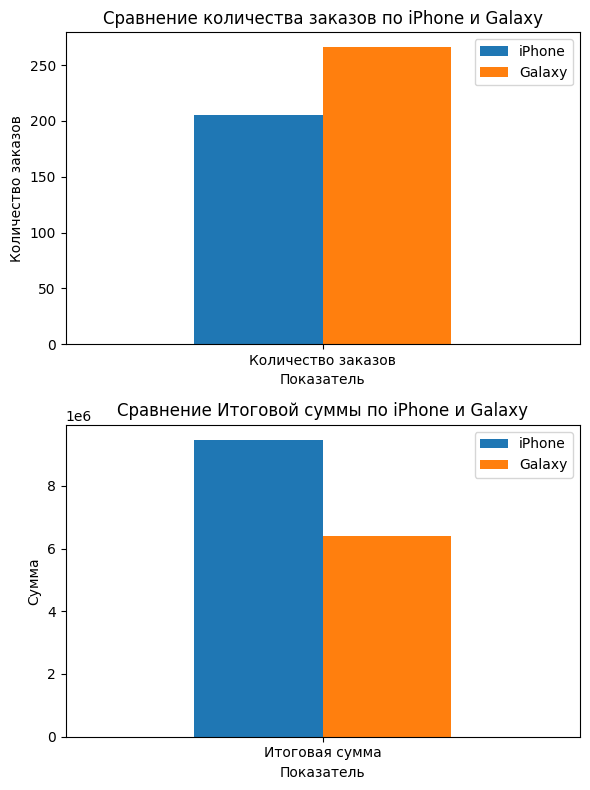

In [486]:
# Визуализация результатов с использованием двух столбчатых диаграмм с перевернутой подписью оси X
fig, axs = plt.subplots(2, 1, figsize=(6, 8))

comparison_table[comparison_table['Показатель'] == 'Количество заказов'].plot(x='Показатель', y=['iPhone', 'Galaxy'], kind='bar', ax=axs[0])
axs[0].set_title('Сравнение количества заказов по iPhone и Galaxy')
axs[0].set_ylabel('Количество заказов')
axs[0].set_xlabel('Показатель')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)  # Поворот подписей оси X

comparison_table[comparison_table['Показатель'] == 'Итоговая сумма'].plot(x='Показатель', y=['iPhone', 'Galaxy'], kind='bar', ax=axs[1])
axs[1].set_title('Сравнение Итоговой суммы по iPhone и Galaxy')
axs[1].set_ylabel('Сумма')
axs[1].set_xlabel('Показатель')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)  # Поворот подписей оси X

plt.tight_layout()
plt.show()

### по п.1
1. По сумме продаж у товаров iPhone больше, чем у Galaxy (9 469 897 vs 6 414 854 по сумме)
2. Количество продаж товаров Galaxy больше, чем iPhone (266 vs 205)

## Динамика по категориям продаж

Динамика продаж по месяцам и категории товара:
Год   Месяц  Категория                    
2021  7      \N                                740710
             Бытовая техника                  2047774
             Гипермаркет                         4578
             Дети и младенцы                   128909
             Дом и быт                         550253
                                               ...   
2022  1      Мобильные телефоны и планшеты    8250788
             Мужская мода                     1026922
             Развлечения                       510929
             Традиционные подарки              520404
             Школа и образование                66501
Name: Итоговая сумма, Length: 112, dtype: int64


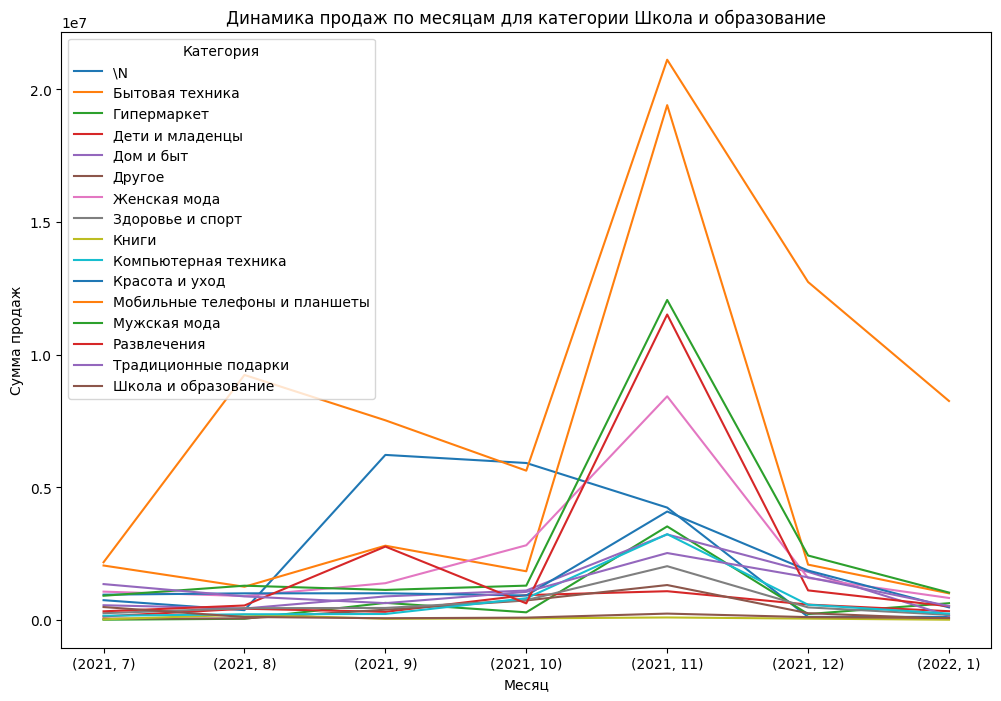

In [487]:
import matplotlib.pyplot as plt

# Создаем подграфики для каждой категории товара
fig, ax = plt.subplots(figsize=(12, 8))

# Преобразуем данные о дате создания и добавим новый столбец 'Месяц' и 'Год'
df['Дата создания'] = pd.to_datetime(df['Дата создания'])
df['Месяц'] = df['Дата создания'].dt.month
df['Год'] = df['Дата создания'].dt.year

# Сгруппируем данные по месяцу и году и по категории товара, а также посчитаем сумму продаж
sales_by_month_category = df.query('Статус in ("завершен","получен")').groupby(['Год', 'Месяц', 'Категория'])['Итоговая сумма'].sum()

# Уберем пустые месяцы (если они есть)
sales_by_month_category = sales_by_month_category[sales_by_month_category != 0]

# Выведем динамику продаж по месяцам в виде таблицы
print('Динамика продаж по месяцам и категории товара:')
print(sales_by_month_category)

# Построим графики для каждой категории товара
for category, data in sales_by_month_category.groupby('Категория'):
    data.unstack().plot(ax=ax, kind='line', xlabel='Месяц', ylabel='Сумма продаж', title=f'Динамика продаж по месяцам для категории {category}')

plt.show()

### по п.2
1. У категории "Мобильные телефоны и планшеты" было два пика - 2021-08 и 2021-11
2. У категории "\NР" было два пика - 2021-09 и 2021-10
3. У категории "Развлечения" и "Бытовая техника" было два пика - 2021-09 и 2021-11
4. У остальных категорий пик приходится на 2021-11



## Подсчет доли повторных покупателей

In [488]:
# Находим повторных покупателей
repeated_customers = df[df.duplicated(subset='ID клиента', keep=False)]

# Подсчитываем долю повторных покупателей
repeated_customers_count = repeated_customers['ID клиента'].nunique()
total_customers = df['ID клиента'].nunique()

repeated_customers_ratio = repeated_customers_count / total_customers
print(f'Общее количество уникальных клиентов: {total_customers}')
print(f'Количество повторных покупателей: {repeated_customers_count}')
print(f'Доля повторных покупателей: {repeated_customers_ratio:.2%}')

Общее количество уникальных клиентов: 30874
Количество повторных покупателей: 15445
Доля повторных покупателей: 50.03%


### по п.3
Доля повторных покупателей составляет 50%, что является положительной характеристикой маркетплейса

## Определяем корреляцию между количеством заказов и категорией товара

In [489]:
# Замена значения '\N' на 'N' в столбце 'Категория'
df['Категория'] = df['Категория'].replace('\\N', 'N')

In [490]:
# Применение для категорий one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Категория'])

In [491]:
# Инициализация словаря для хранения результатов
correlations = {}

In [492]:
# Вычисление корреляции и p - значения для каждой категории
for column in df_encoded.columns:
  if column.startswith('Категория'):
    corr, p_value = pearsonr(df_encoded['Количество заказов'], df_encoded[column])
    correlations[column] = (corr, p_value)

# Печать корреляций и p - значений
print("Корреляция и р-значения:")
for key, value in correlations.items():
  print(f"{key}: корреляция = {value[0]:.3f}, p-значение = {value[1]:.3f}")

Корреляция и р-значения:
Категория_N: корреляция = 0.015, p-значение = 0.000
Категория_Бытовая техника: корреляция = -0.012, p-значение = 0.000
Категория_Гипермаркет: корреляция = 0.015, p-значение = 0.000
Категория_Дети и младенцы: корреляция = -0.004, p-значение = 0.114
Категория_Дом и быт: корреляция = 0.003, p-значение = 0.220
Категория_Другое: корреляция = -0.000, p-значение = 0.972
Категория_Женская мода: корреляция = -0.014, p-значение = 0.000
Категория_Здоровье и спорт: корреляция = -0.000, p-значение = 0.865
Категория_Книги: корреляция = 0.003, p-значение = 0.303
Категория_Компьютерная техника: корреляция = -0.008, p-значение = 0.005
Категория_Красота и уход: корреляция = -0.006, p-значение = 0.023
Категория_Мобильные телефоны и планшеты: корреляция = -0.020, p-значение = 0.000
Категория_Мужская мода: корреляция = -0.013, p-значение = 0.000
Категория_Развлечения: корреляция = -0.011, p-значение = 0.000
Категория_Традиционные подарки: корреляция = 0.053, p-значение = 0.000
Кате

In [493]:
# Определение значимых корреляций (р-значение < 0.05)
significant_correlations = {key: value for key, value in correlations.items() if value[1] < 0.05}

print("\nЗначимые корреляции (р-значение < 0,05):")
for key, value in significant_correlations.items():
  print(f"{key}: корреляция = {value[0]:.3f}, р-значение = {value[1]:.3f}")


Значимые корреляции (р-значение < 0,05):
Категория_N: корреляция = 0.015, р-значение = 0.000
Категория_Бытовая техника: корреляция = -0.012, р-значение = 0.000
Категория_Гипермаркет: корреляция = 0.015, р-значение = 0.000
Категория_Женская мода: корреляция = -0.014, р-значение = 0.000
Категория_Компьютерная техника: корреляция = -0.008, р-значение = 0.005
Категория_Красота и уход: корреляция = -0.006, р-значение = 0.023
Категория_Мобильные телефоны и планшеты: корреляция = -0.020, р-значение = 0.000
Категория_Мужская мода: корреляция = -0.013, р-значение = 0.000
Категория_Развлечения: корреляция = -0.011, р-значение = 0.000
Категория_Традиционные подарки: корреляция = 0.053, р-значение = 0.000


### по п.4
Статистически значимые корреляции между количеством заказов и категорией товара отсутствуют

## Определяем корреляцию между отменами заказа и методом оплаты

In [494]:
# Применение one-hot encoding для метода оплаты и статуса
df['Количество отмен'] =df['Статус'].apply(lambda x: 1 if x == 'отменен' else 0)

In [495]:
# Применение для методов оплаты one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Метод оплаты'])

In [496]:
# Инициализация словаря для хранения результатов
correlations = {}

# Вычисление корреляции и p-значения для каждого метода оплаты
for column in df_encoded.columns:
    if column.startswith('Метод оплаты'):
        corr, p_value = pearsonr(df_encoded['Количество отмен'], df_encoded[column])
        correlations[column] = (corr, p_value)

# Печать корреляций и p-значений
print("Корреляция и p-значения:")
for key, value in correlations.items():
    print(f"{key}: корреляция = {value[0]:.3f}, p-значение = {value[1]:.3f}")

Корреляция и p-значения:
Метод оплаты_ваучер: корреляция = 0.199, p-значение = 0.000
Метод оплаты_дебетовая карта Raif: корреляция = 0.102, p-значение = 0.000
Метод оплаты_клиентский кредит: корреляция = -0.071, p-значение = 0.000
Метод оплаты_кредитная карта UBL: корреляция = 0.078, p-значение = 0.000
Метод оплаты_маркетинговые расходы: корреляция = 0.035, p-значение = 0.000
Метод оплаты_мобильный банкинг MCB: корреляция = 0.016, p-значение = 0.000
Метод оплаты_наличные при доставке: корреляция = -0.044, p-значение = 0.000
Метод оплаты_наложенный платеж: корреляция = -0.598, p-значение = 0.000
Метод оплаты_платежная система Payaxis: корреляция = 0.528, p-значение = 0.000
Метод оплаты_товарный кредит: корреляция = -0.013, p-значение = 0.000


In [497]:
# Определение значимых корреляций (p-значение < 0.05)
significant_correlations = {key: value for key, value in correlations.items() if value[1] < 0.05}

print("\nЗначимые корреляции (p-значение < 0.05):")
for key, value in significant_correlations.items():
    print(f"{key}: корреляция = {value[0]:.3f}, p-значение = {value[1]:.3f}")


Значимые корреляции (p-значение < 0.05):
Метод оплаты_ваучер: корреляция = 0.199, p-значение = 0.000
Метод оплаты_дебетовая карта Raif: корреляция = 0.102, p-значение = 0.000
Метод оплаты_клиентский кредит: корреляция = -0.071, p-значение = 0.000
Метод оплаты_кредитная карта UBL: корреляция = 0.078, p-значение = 0.000
Метод оплаты_маркетинговые расходы: корреляция = 0.035, p-значение = 0.000
Метод оплаты_мобильный банкинг MCB: корреляция = 0.016, p-значение = 0.000
Метод оплаты_наличные при доставке: корреляция = -0.044, p-значение = 0.000
Метод оплаты_наложенный платеж: корреляция = -0.598, p-значение = 0.000
Метод оплаты_платежная система Payaxis: корреляция = 0.528, p-значение = 0.000
Метод оплаты_товарный кредит: корреляция = -0.013, p-значение = 0.000


In [498]:
df.query('Статус == "отменен"').groupby('Метод оплаты').agg({'ID транзакции':'count'}).reset_index()

,Метод оплаты,ID транзакции
0,ваучер,12385
1,дебетовая карта Raif,638
2,клиентский кредит,18
3,кредитная карта UBL,635
4,маркетинговые расходы,284
5,мобильный банкинг MCB,177
6,наличные при доставке,5
7,наложенный платеж,4789
8,платежная система Payaxis,22249
9,товарный кредит,10


In [499]:
df.query('Статус == "завершен"').groupby('Метод оплаты').agg({'ID транзакции':'count'}).reset_index()

,Метод оплаты,ID транзакции
0,ваучер,11466
1,дебетовая карта Raif,16
2,клиентский кредит,1403
3,кредитная карта UBL,174
4,маркетинговые расходы,197
5,мобильный банкинг MCB,213
6,наличные при доставке,633
7,наложенный платеж,57821
8,платежная система Payaxis,5811
9,товарный кредит,76


In [500]:
df.groupby('Метод оплаты').agg({'ID транзакции':'count'}).reset_index()

,Метод оплаты,ID транзакции
0,ваучер,25465
1,дебетовая карта Raif,658
2,клиентский кредит,1781
3,кредитная карта UBL,849
4,маркетинговые расходы,512
5,мобильный банкинг MCB,415
6,наличные при доставке,681
7,наложенный платеж,80369
8,платежная система Payaxis,29153
9,товарный кредит,118


### по п.5 значимые корреляции с отменой заказа наблюдаются при методах оплаты  Payaxis, дебетовая карта Raif и ваучер:
1. платежная система Payaxis - 0.5 (отмен 76% от всего количества заказов, завершенных только 20%)
2. дебетовая карта Raif - 0.1 (отмен 97% от всего количества заказов, завершенных - 0,02%)
3. ваучер - 0.2 (отмен 49% от всего количества заказов, завершенных - 45%)

*для сведения:*
*наложенный платеж - 0.6 (отмен 6% от всего количества заказов, завершенных - 72%)* *для сведения*



## Изучение аудитории по дате начала обслуживания

In [501]:
# Преобразование столбца "Дата начала обслуживания клиента" в формат %YYYY%MM
df['Дата начала обслуживания клиента'] = pd.to_datetime(df['Дата начала обслуживания клиента'], format='%Y-%m')

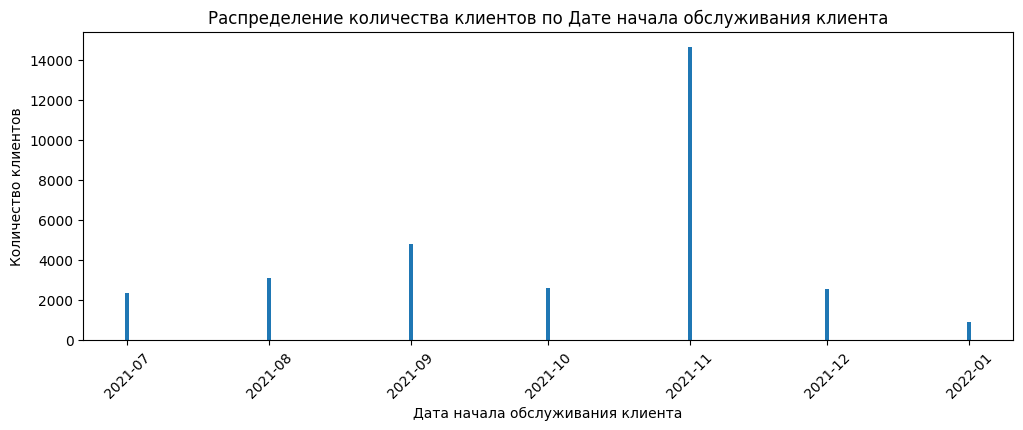

In [502]:
# Определение новых клиентов
new_clients = df.groupby('ID клиента')['Дата начала обслуживания клиента'].min().reset_index()
new_clients.columns = ['ID клиента', 'Дата первого заказа']

# Построение распределения количества клиентов по "Дата начала обслуживания клиента"
client_distribution = df.groupby('Дата начала обслуживания клиента')['ID клиента'].nunique().reset_index()
client_distribution.columns = ['Дата начала обслуживания клиента', 'Количество клиентов']

# Визуализация гистограммы
plt.figure(figsize=(12, 4))
plt.bar(client_distribution['Дата начала обслуживания клиента'], client_distribution['Количество клиентов'])
plt.xlabel('Дата начала обслуживания клиента')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества клиентов по Дате начала обслуживания клиента')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

In [503]:
# Определение даты для расчета лайфтайма
reference_date = pd.to_datetime('2022-02', format='%Y-%m')

In [504]:
# Рассчитываем лайфтайм клиентов в месяцах
df['Лайфтайм в месяцах'] = (reference_date.year - df['Дата начала обслуживания клиента'].dt.year)*12 + (reference_date.month - df['Дата начала обслуживания клиента'].dt.month)

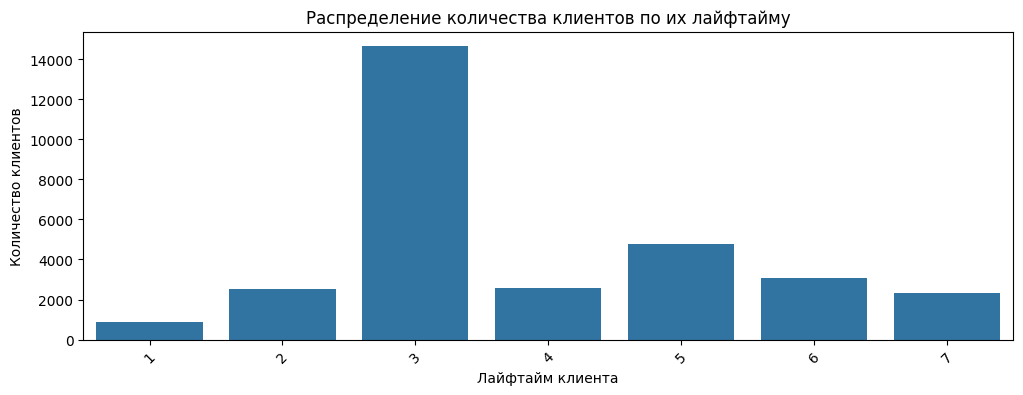

In [505]:
# Группировка данных по дате начала обслуживания и подсчет количества уникальных клиентов
clients_per_date = df.groupby('Лайфтайм в месяцах')['ID клиента'].nunique().reset_index()

# Переименование столбцов для удобства
clients_per_date.columns = ['Лайфтайм в месяцах', 'Количество клиентов']
# Визуализация распределения количества клиентов по дате начала обслуживания
plt.figure(figsize=(12, 4))
sns.barplot(x='Лайфтайм в месяцах', y='Количество клиентов', data=clients_per_date)
plt.title('Распределение количества клиентов по их лайфтайму')
plt.xlabel('Лайфтайм клиента')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

### по п.6
Наибольшее количество клиентов было привлечено 2021-11, больше всего клиентов с Лайфтаймом 3 месяца

## Выводы по второй части исследования

1. По сумме продаж товаров у iPhone больше, чем у Galaxy (9 469 897 vs 6 414 854 по сумме). Количество продаж товаров Galaxy больше, чем iPhone (266 vs 205)
2. У категории "Мобильные телефоны и планшеты" было два пика - 2021-08 и 2021-11. У категории "\NР" было два пика - 2021-09 и 2021-10. У категории "Развлечения" и "Бытовая техника" было два пика - 2021-09 и 2021-11. У остальных категорий пик приходится на 2021-11
3. Доля повторных покупателей составляет 50%, что является положительной характеристикой маркетплейса.
4. Статистически значимые корреляции между категорией товара и количеством заказов отсутствуют.
5. Вывод: значимые корреляции с отменой заказа наблюдаются при методах оплаты  Payaxis, ебетовая карта Raif и ваучер:
  1) платежная система Payaxis - 0.5 (отмен 76% от всего количества заказов, завершенных только 20%)
  2) дебетовая карта Raif - 0.1 (отмен 97% от всего количества заказов, завершенных - 0,02%)
  3) ваучер - 0.2 (отмен 49% от всего количества заказов, завершенных - 45%)
(*для сведения:*
*наложенный платеж - 0.6 (отмен 6% от всего количества заказов, завершенных - 72%)* *для сведения*)
6. Наибольшее количество клиентов было привлечено 2021-11, больше всего клиентов с Лайфтаймом 3 месяца.